In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user,
        postgres_pw, postgres_host, postgres_port, postgres_db))

In [4]:
df = pd.read_sql_query('select * from studentsperformance',con=engine)
engine.dispose()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?


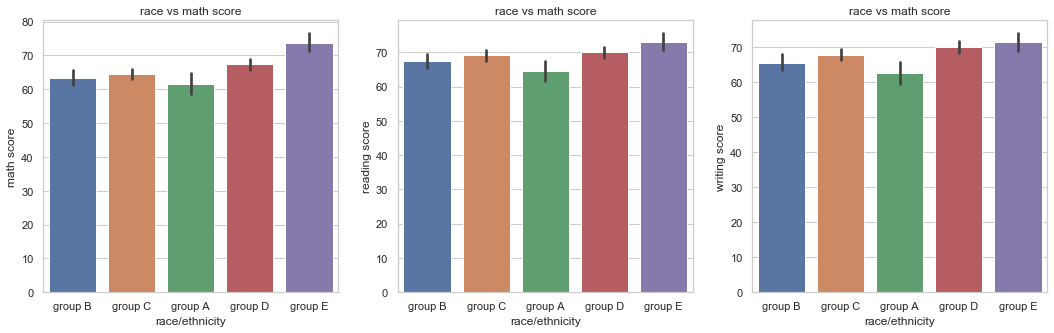

In [9]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(df["race/ethnicity"], df["math score"])
plt.title("race vs math score")

plt.subplot(1,3,2)
sns.barplot(df["race/ethnicity"], df["reading score"])
plt.title("race vs math score")

plt.subplot(1,3,3)
sns.barplot(df["race/ethnicity"], df["writing score"])
plt.title("race vs math score")
plt.show()



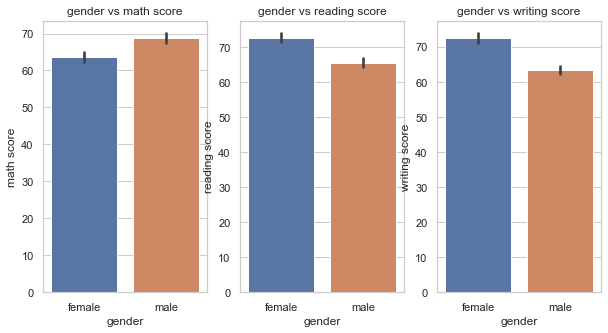

In [28]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
sns.barplot(df["gender"], df["math score"])
plt.title("gender vs math score")

plt.subplot(1,3,2)
sns.barplot(df["gender"], df["reading score"])
plt.title("gender vs reading score")

plt.subplot(1,3,3)
sns.barplot(df["gender"], df["writing score"])
plt.title("gender vs writing score")
plt.show()

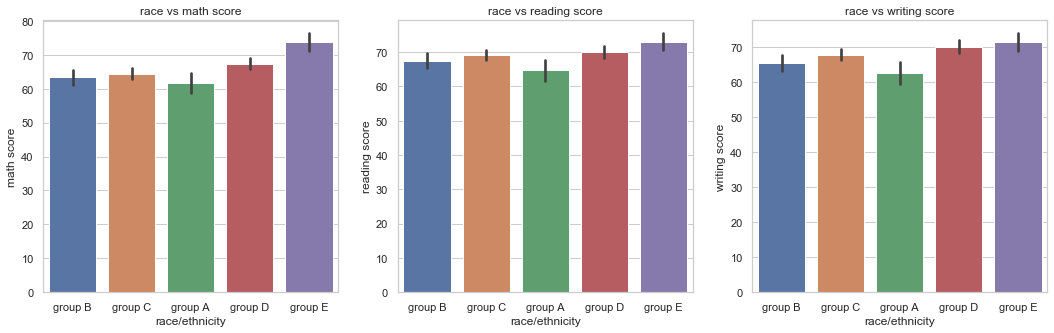

In [29]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(df["race/ethnicity"], df["math score"])
plt.title("race vs math score")

plt.subplot(1,3,2)
sns.barplot(df["race/ethnicity"], df["reading score"])
plt.title("race vs reading score")

plt.subplot(1,3,3)
sns.barplot(df["race/ethnicity"], df["writing score"])
plt.title("race vs writing score")
plt.show()

In [40]:
np.unique(df['race/ethnicity'])

array(['group A', 'group B', 'group C', 'group D', 'group E'],
      dtype=object)

To compare differences between groups:

In [47]:
group = np.unique(df['race/ethnicity'])
group[1]
#df['race/ethnicity'][group[1]]

for i in range(0,df['race/ethnicity'].nunique()):
    for j in range(i+1, df['race/ethnicity'].nunique()):
        print(stats.ttest_ind(df.loc[df['race/ethnicity']==group[i], 'math score'],
                               df.loc[df['race/ethnicity']==group[j], 'math score']))

Ttest_indResult(statistic=-0.9355076279747488, pvalue=0.3503415961659957)
Ttest_indResult(statistic=-1.5997220303217299, pvalue=0.11043810745588042)
Ttest_indResult(statistic=-3.3466982429712298, pvalue=0.0009068636053543751)
Ttest_indResult(statistic=-5.936141025544798, pvalue=1.083559122656415e-08)
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
Ttest_indResult(statistic=-4.282287214674715, pvalue=2.3187640326715042e-05)


# Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?


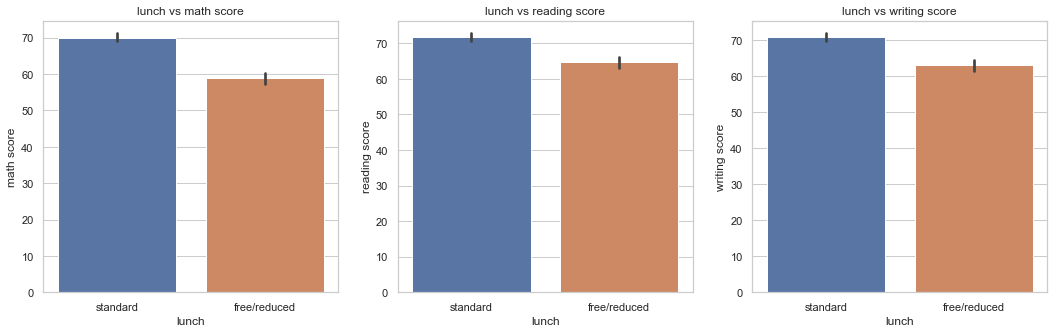

In [27]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(df["lunch"], df["math score"])
plt.title("lunch vs math score")

plt.subplot(1,3,2)
sns.barplot(df["lunch"], df["reading score"])
plt.title("lunch vs reading score")

plt.subplot(1,3,3)
sns.barplot(df["lunch"], df["writing score"])
plt.title("lunch vs writing score")
plt.show()

In schools that have subsidized lunch, education budgets are also less, and therefore provide lower quality of education

# Does the test preparation course seem to have an effect on the exam performances?


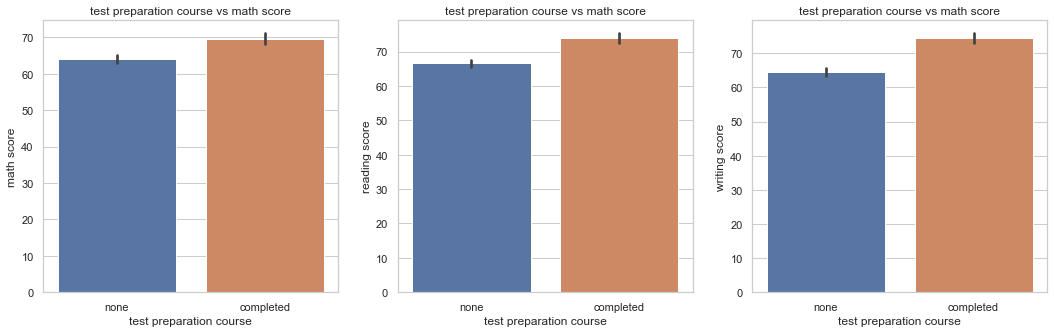

(array([  2.,   6.,  14.,  55., 126., 161., 223., 225., 120.,  68.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <a list of 10 Patch objects>)

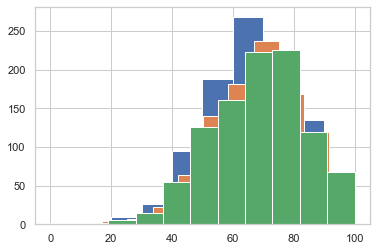

In [23]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(df["test preparation course"], df["math score"])
plt.title("test preparation course vs math score")

plt.subplot(1,3,2)
sns.barplot(df["test preparation course"], df["reading score"])
plt.title("test preparation course vs reading score")

plt.subplot(1,3,3)
sns.barplot(df["test preparation course"], df["writing score"])
plt.title("test preparation course vs writing score")
plt.show()

plt.hist(df["math score"])
plt.hist(df["reading score"])
plt.hist(df["writing score"])

Test preparation course seems to improve scores in all categories. Since scores are normally distributed, can run independent t-tests

In [34]:
print(stats.ttest_ind(df.loc[df["test preparation course"]=='none', 'math score'], 
                       df.loc[df["test preparation course"]=='completed', 'math score']))
print(stats.ttest_ind(df.loc[df["test preparation course"]=='none', 'reading score'], 
                       df.loc[df["test preparation course"]=='completed', 'reading score']))
print(stats.ttest_ind(df.loc[df["test preparation course"]=='none', 'writing score'], 
                       df.loc[df["test preparation course"]=='completed', 'writing score']))

Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)
Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)


# Which 2 exam scores are most correlated with each other?

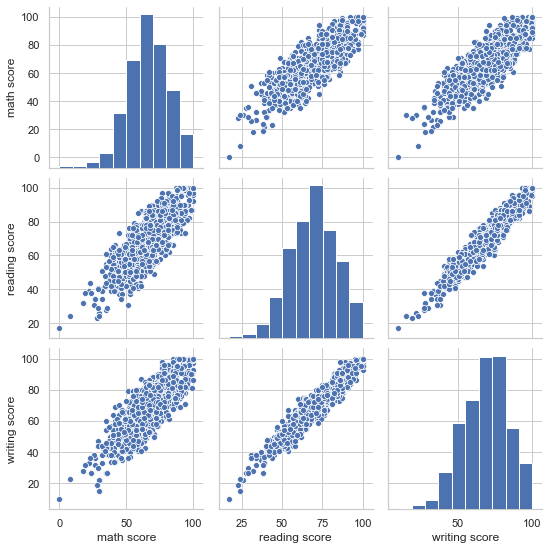

In [35]:
sns.pairplot(df)

Reading and writing scores seem to best correlated visually

In [36]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


correlation coefficients confirm this.